In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report



Load Dataset


In [3]:
data = pd.read_csv("loan_dataset_20000.csv")
data.head()


,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


#Check Missing Values


In [4]:
data.isnull().sum()


age                     0
gender                  0
marital_status          0
education_level         0
annual_income           0
monthly_income          0
employment_status       0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
loan_purpose            0
interest_rate           0
loan_term               0
installment             0
grade_subgrade          0
num_of_open_accounts    0
total_credit_limit      0
current_balance         0
delinquency_history     0
public_records          0
num_of_delinquencies    0
loan_paid_back          0
dtype: int64

#Handle Numerical Column

In [5]:
categorical_cols = [
    'gender',
    'marital_status',
    'education_level',
    'employment_status',
    'loan_purpose',
    'grade_subgrade'
]

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_8000\1113778312.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [6]:
numerical_cols = [
    'annual_income',
    'monthly_income',
    'loan_amount',
    'credit_score',
    'debt_to_income_ratio',
    'installment',
    'total_credit_limit',
    'current_balance'
]

for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_8000\1747737210.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_8000\1747737210.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

#Loan Distribution Method


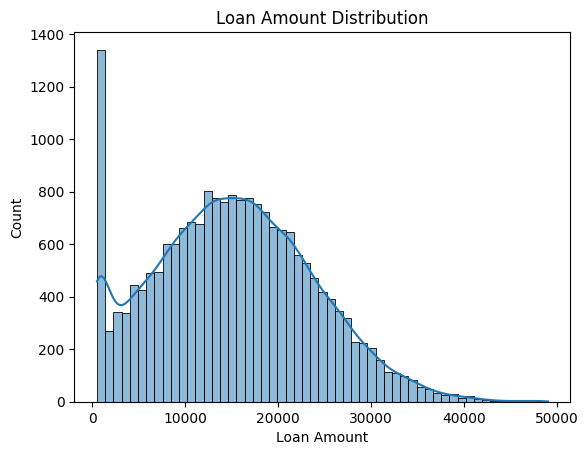

In [7]:
plt.figure()
sns.histplot(data['loan_amount'], kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()


#Education Level vs Loan Paid Back

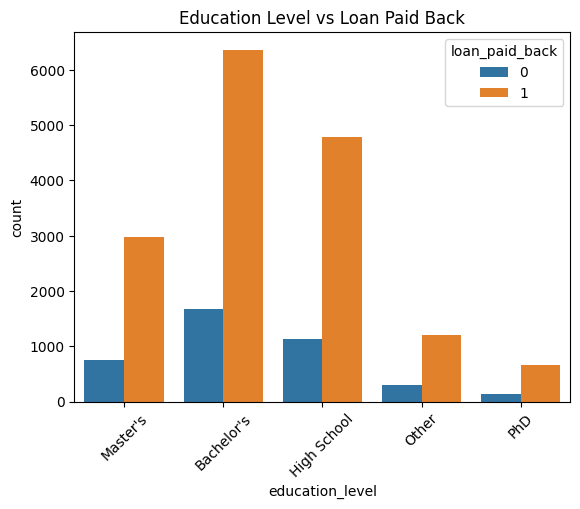

In [8]:
plt.figure()
sns.countplot(x='education_level', hue='loan_paid_back', data=data)
plt.title("Education Level vs Loan Paid Back")
plt.xticks(rotation=45)
plt.show()


#Annual Income Distribution

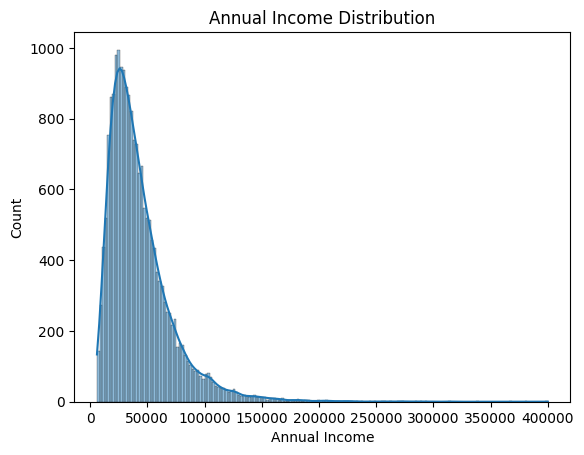

In [9]:
plt.figure()
sns.histplot(data['annual_income'], kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.show()


#Convert Categorical Variables

In [10]:
data = pd.get_dummies(data, drop_first=True)


#Define Features&Targets

In [11]:
X = data.drop("loan_paid_back", axis=1)
y = data["loan_paid_back"]



#Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Train Models
Logistic Regression

In [13]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Decision Tree

In [14]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


#Model Evalution
.Accuracy

In [15]:
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.863
Decision Tree Accuracy: 0.8275


#Confusion Matrix

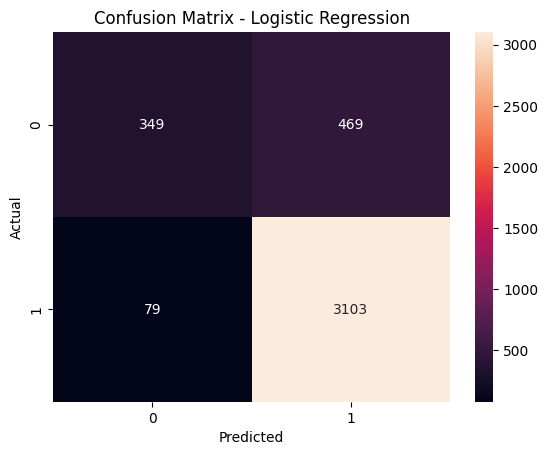

In [16]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Classification Report

In [19]:
print("\nLogistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.82      0.43      0.56       818
           1       0.87      0.98      0.92      3182

    accuracy                           0.86      4000
   macro avg       0.84      0.70      0.74      4000
weighted avg       0.86      0.86      0.85      4000

